In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
from inspector import Inspector
from tqdm import tqdm
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [57]:
config = load_config_and_check("../config/qfl_v00.yaml")

In [58]:
PATH_TESTED = os.path.join(
    config["experiment_folder"], "programs", "metadata"
)
metadata_files = [
    os.path.join(PATH_TESTED, filename) 
    for filename in os.listdir(PATH_TESTED)
    if not filename.endswith("_exec.json")
]
metadata_files[:10]

['../data/qfl_v00/programs/metadata/fa818cd09710495eac83fd95fd0df81f.json',
 '../data/qfl_v00/programs/metadata/10464be498874b54b8ffbfcdfb15883d.json',
 '../data/qfl_v00/programs/metadata/967c907b92c8432d97f93e9fd54f5ed6.json',
 '../data/qfl_v00/programs/metadata/57d51d2c87f3445092493041cdfa7f5b.json',
 '../data/qfl_v00/programs/metadata/ec0756413779483cafb2b8cbb96d3bfc.json',
 '../data/qfl_v00/programs/metadata/561adeb157af493bb26a9972d31b6552.json',
 '../data/qfl_v00/programs/metadata/f10e1f0a183e42f3b6e1d3df23818b5c.json',
 '../data/qfl_v00/programs/metadata/f7d353f63dba4d68a501e9fc6220f72b.json',
 '../data/qfl_v00/programs/metadata/85f9fe0dd3c84025a7a596e9eab4b322.json',
 '../data/qfl_v00/programs/metadata/2cca7b29228e4b11a093e2bc5e038df6.json']

In [67]:
pd.json_normalize([{
    "program_id": "02da8f4d2f1d44a1b741bca2ff7f263d",
    "qasm": {
        "program_id": "02da8f4d2f1d44a1b741bca2ff7f263d",
        "qasm_filepath": "../data/qfl_v00/programs/qasm/02da8f4d2f1d44a1b741bca2ff7f263d.qasm",
        "n_qubits": 6,
        "n_ops": 184,
        "gate_set": {
            "cx": 3,
            "rx": 1,
            "ry": 1,
            "rz": 1,
            "p": 1
        },
        "strategy_program_generation": "WeightedRandomCircuitGenerator",
        "circuit_id": "02da8f4d2f1d44a1b741bca2ff7f263d",
        "benchmark_name": "seed_42"
    },
    "divergence": {
        "ks": {
            "statistic": 0.0157470703125,
            "p-value": 0.26173011163106014
        }
    },
    "platform_names": [
        "qiskit",
        "cirq"
    ],
    "shots": 8192
}])


,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,02da8f4d2f1d44a1b741bca2ff7f263d,"[qiskit, cirq]",8192,02da8f4d2f1d44a1b741bca2ff7f263d,../data/qfl_v00/programs/qasm/02da8f4d2f1d44a1...,6,184,3,1,1,1,1,WeightedRandomCircuitGenerator,02da8f4d2f1d44a1b741bca2ff7f263d,seed_42,0.015747,0.26173


In [59]:
def pandize(file_list):
    """Create a pandas dataframe with the json file passed."""
    records = []
    for filepaths in tqdm(file_list):
        with open(filepaths, 'r') as in_file:
            data = json.load(in_file)
        records.append(data)
    return pd.json_normalize(records)
    # return pd.DataFrame.from_records(records)
    
df = pandize(file_list=metadata_files)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83954/83954 [03:27<00:00, 404.95it/s]


In [66]:
df_small = pandize(file_list=metadata_files[:1])
df_small.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 276.23it/s]


,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,fa818cd09710495eac83fd95fd0df81f,"[qiskit, cirq]",8192,fa818cd09710495eac83fd95fd0df81f,../data/qfl_v00/programs/qasm/fa818cd09710495e...,9,90,3,1,1,1,1,WeightedRandomCircuitGenerator,fa818cd09710495eac83fd95fd0df81f,seed_42,0.010254,0.782302


In [60]:
df.head()

,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,fa818cd09710495eac83fd95fd0df81f,"[qiskit, cirq]",8192,fa818cd09710495eac83fd95fd0df81f,../data/qfl_v00/programs/qasm/fa818cd09710495e...,9,90,3,1,1,1,1,WeightedRandomCircuitGenerator,fa818cd09710495eac83fd95fd0df81f,seed_42,0.010254,0.782302
1,10464be498874b54b8ffbfcdfb15883d,"[qiskit, cirq]",8192,10464be498874b54b8ffbfcdfb15883d,../data/qfl_v00/programs/qasm/10464be498874b54...,5,32,3,1,1,1,1,WeightedRandomCircuitGenerator,10464be498874b54b8ffbfcdfb15883d,seed_42,0.014771,0.333291
2,967c907b92c8432d97f93e9fd54f5ed6,"[qiskit, cirq]",8192,967c907b92c8432d97f93e9fd54f5ed6,../data/qfl_v00/programs/qasm/967c907b92c8432d...,15,181,3,1,1,1,1,WeightedRandomCircuitGenerator,967c907b92c8432d97f93e9fd54f5ed6,seed_42,0.011597,0.640362
3,57d51d2c87f3445092493041cdfa7f5b,"[qiskit, cirq]",8192,57d51d2c87f3445092493041cdfa7f5b,../data/qfl_v00/programs/qasm/57d51d2c87f34450...,4,72,3,1,1,1,1,WeightedRandomCircuitGenerator,57d51d2c87f3445092493041cdfa7f5b,seed_42,0.008545,0.925945
4,ec0756413779483cafb2b8cbb96d3bfc,"[qiskit, cirq]",8192,ec0756413779483cafb2b8cbb96d3bfc,../data/qfl_v00/programs/qasm/ec0756413779483c...,5,41,3,1,1,1,1,WeightedRandomCircuitGenerator,ec0756413779483cafb2b8cbb96d3bfc,seed_42,0.008911,0.901014


<AxesSubplot:xlabel='divergence.ks.statistic', ylabel='Count'>

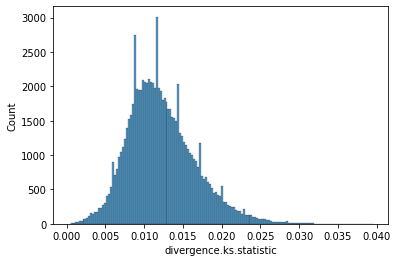

In [61]:
sns.histplot(
    data=df,
    x='divergence.ks.statistic'
)

<AxesSubplot:xlabel='divergence.ks.p-value', ylabel='Count'>

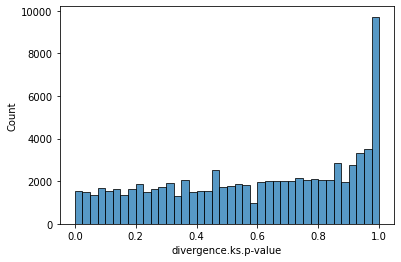

In [62]:
sns.histplot(
    data=df,
    x='divergence.ks.p-value'
)

In [38]:
df[['program_id', 'qasm.n_ops', 'qasm.n_qubits', "divergence.ks.p-value", "divergence.ks.statistic"]].sort_values(by="divergence.ks.p-value")

,program_id,qasm.n_ops,qasm.n_qubits,divergence.ks.p-value,divergence.ks.statistic
59133,5ebce9e92acf432ab4125f8269cfb037,122,17,0.000005,0.039551
25360,523fa7155ba54e7d9fc777fbe394ac12,168,19,0.000031,0.036743
31908,d6f865c85aee492fb299c2eb7ccc9689,37,14,0.000092,0.034912
55299,408a56c7b47e4166bb1007774f18b61b,55,18,0.000092,0.034912
31560,187a9357de3b42b68c16492f992bee8a,194,20,0.000099,0.034790
...,...,...,...,...,...
58605,2c0458f0208f4207a3974fb1d4a443b5,147,2,1.000000,0.002686
36590,dbe08f19e0eb4ab6ade1989a97c77989,98,2,1.000000,0.002441
19064,701a4a8a5a154760ba90251b18ac6f40,176,2,1.000000,0.002563
62625,2de0e73c286f44879891c1aa524954a0,179,2,1.000000,0.002197


## Experiment with SQLITE

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65906 entries, 0 to 65905
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   program_id                        65906 non-null  object 
 1   platform_names                    65906 non-null  object 
 2   shots                             65906 non-null  int64  
 3   qasm.program_id                   65906 non-null  object 
 4   qasm.qasm_filepath                65906 non-null  object 
 5   qasm.n_qubits                     65906 non-null  int64  
 6   qasm.n_ops                        65906 non-null  int64  
 7   qasm.gate_set.cx                  65906 non-null  int64  
 8   qasm.gate_set.rx                  65906 non-null  int64  
 9   qasm.gate_set.ry                  65906 non-null  int64  
 10  qasm.gate_set.rz                  65906 non-null  int64  
 11  qasm.gate_set.p                   65906 non-null  int64  
 12  qasm

In [13]:
import sqlite3 as sl
DB_PATH = os.path.join(config['experiment_folder'], "qdd_debugging.db")
con = sl.connect(DB_PATH)

In [16]:
# create
detector_columns = [c for c in df.columns if c.startswith("divergence.")]
qasm_columns = [c for c in df.columns if c.startswith("qasm.")]
columns_to_save = ['program_id', 'shots'] + qasm_columns + detector_columns
df[columns_to_save].to_sql('DATA', con, if_exists='append')

In [36]:
cur = con.cursor()
table_name = "DATA"
available_tables = cur.execute(f"""
    SELECT tbl_name FROM sqlite_master WHERE type='table'
    AND tbl_name='{table_name}'; 
""").fetchall()

In [37]:
available_tables

[('DATA',)]

In [30]:
# read the existing programs
table_name = "RERUN"
try: 
    present_program_id = pd.read_sql(f'''
        SELECT DISTINCT program_id 
        FROM {table_name}
    ''', con)
except sl.DatabaseError as e:
    print(e)
    present_program_id = []

DatabaseError: Execution failed on sql '
        SELECT DISTINCT program_id 
        FROM RERUN
    ': no such table: RERUN

In [24]:
list(present_program_id["program_id"])

['fa818cd09710495eac83fd95fd0df81f',
 '10464be498874b54b8ffbfcdfb15883d',
 '967c907b92c8432d97f93e9fd54f5ed6',
 '57d51d2c87f3445092493041cdfa7f5b',
 '561adeb157af493bb26a9972d31b6552',
 'f7d353f63dba4d68a501e9fc6220f72b',
 '85f9fe0dd3c84025a7a596e9eab4b322',
 '2cca7b29228e4b11a093e2bc5e038df6',
 '370461ab90614b57baa31c58d15f71df',
 'f2ede802b1284862a8037bbbfb274746',
 '11e9ccc61f7c4eaeb6d28071bbb1ae29',
 '0606fdda239b4ed5a7a9e7e68d33c183',
 'c8c4d09cce5247c7bf18cefcbbdba685',
 'd87be7b26c004c4cbc48df95f8bfccf4',
 'ceb1dec501044e0ca230e918ba138496',
 '7022f8eb289346b2b389f4b446c74c6d',
 'ccd0954a1c9040889aa3cd13369bfb2f',
 'f223ed00465a4410acdeaf309b31f3d5',
 '3609ac949618472bb6857d359999c2cf',
 '3500e0b90b4842c1876f5cc900bef734',
 'c01c5d7b8bba4d9f95d6c1f58282a21a',
 'c2b8e9e0a2af427ca1a08fa8c63f87f1',
 'cfd51249268e489aad7dc4484ba7c3d5',
 'c1f3e54b988448a981935a4c144824f6',
 'e4c2f00b8b3249a0a57c92dc68016e2f',
 '913f568e7fef43a19db2675417a01e52',
 'c0aae7deaff94da882210515826a7ed1',
 

In [56]:
test_name = "ks"
top_k = 10
df_most_divergent = pd.read_sql(f'''
    SELECT program_id, [divergence.{test_name}.statistic], [divergence.{test_name}.p-value] 
    FROM DATA
    ORDER BY
        [divergence.{test_name}.statistic] DESC,
        [divergence.{test_name}.p-value]  ASC
    LIMIT {top_k};
''', con)
#df_most_divergent.columns = [
#    c.replace("'", "") for c in df_most_divergent.columns
#]
list(df_most_divergent["program_id"])

['5ebce9e92acf432ab4125f8269cfb037',
 '523fa7155ba54e7d9fc777fbe394ac12',
 'd6f865c85aee492fb299c2eb7ccc9689',
 '408a56c7b47e4166bb1007774f18b61b',
 '187a9357de3b42b68c16492f992bee8a',
 'af428df6acb04e77998c92dd67b03f37',
 '79270a0342674765b1fa8669e95d7985',
 'b920d97856a04575acba63bd064520b8',
 '2b8cf4d141be4046ad9f38d37b6db4d5',
 'b626ad33fc4440edbfe2e2e2276d6073']

In [49]:
df_back = pd.read_sql(f'''
    SELECT *
    FROM DATA
''', con)
df_back.head()

,index,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,0,fa818cd09710495eac83fd95fd0df81f,None,8192,fa818cd09710495eac83fd95fd0df81f,../data/qfl_v00/programs/qasm/fa818cd09710495e...,9,90,3,1,1,1,1,WeightedRandomCircuitGenerator,fa818cd09710495eac83fd95fd0df81f,seed_42,0.010254,0.782302
1,1,10464be498874b54b8ffbfcdfb15883d,None,8192,10464be498874b54b8ffbfcdfb15883d,../data/qfl_v00/programs/qasm/10464be498874b54...,5,32,3,1,1,1,1,WeightedRandomCircuitGenerator,10464be498874b54b8ffbfcdfb15883d,seed_42,0.014771,0.333291
2,2,967c907b92c8432d97f93e9fd54f5ed6,None,8192,967c907b92c8432d97f93e9fd54f5ed6,../data/qfl_v00/programs/qasm/967c907b92c8432d...,15,181,3,1,1,1,1,WeightedRandomCircuitGenerator,967c907b92c8432d97f93e9fd54f5ed6,seed_42,0.011597,0.640362
3,3,57d51d2c87f3445092493041cdfa7f5b,None,8192,57d51d2c87f3445092493041cdfa7f5b,../data/qfl_v00/programs/qasm/57d51d2c87f34450...,4,72,3,1,1,1,1,WeightedRandomCircuitGenerator,57d51d2c87f3445092493041cdfa7f5b,seed_42,0.008545,0.925945
4,4,561adeb157af493bb26a9972d31b6552,None,8192,561adeb157af493bb26a9972d31b6552,../data/qfl_v00/programs/qasm/561adeb157af493b...,15,96,3,1,1,1,1,WeightedRandomCircuitGenerator,561adeb157af493bb26a9972d31b6552,seed_42,0.017700,0.153537


In [41]:
df_back.columns

Index(['index', 'program_id', 'platform_names', 'shots', 'qasm.program_id',
       'qasm.qasm_filepath', 'qasm.n_qubits', 'qasm.n_ops', 'qasm.gate_set.cx',
       'qasm.gate_set.rx', 'qasm.gate_set.ry', 'qasm.gate_set.rz',
       'qasm.gate_set.p', 'qasm.strategy_program_generation',
       'qasm.circuit_id', 'qasm.benchmark_name', 'divergence.ks.statistic',
       'divergence.ks.p-value'],
      dtype='object')

In [42]:
"divergence.ks.statistic" in df_back.columns

True

In [69]:
import sqlite3 as sl
DB_PATH = os.path.join(config['experiment_folder'], "qdd_debugging.db")
con = sl.connect(DB_PATH)
present_program_id = pd.read_sql(f'''
    SELECT DISTINCT program_id 
    FROM RERUN
''', con)

In [70]:
present_program_id

,program_id
0,5ebce9e92acf432ab4125f8269cfb037


In [74]:
df_most_divergent = pd.read_sql(f'''
    SELECT program_id, [divergence.{test_name}.statistic], [divergence.{test_name}.p-value]
    FROM DATA
    WHERE program_id NOT IN (SELECT DISTINCT program_id FROM RERUN)
    ORDER BY
        [divergence.{test_name}.statistic] DESC,
        [divergence.{test_name}.p-value]  ASC
    LIMIT {top_k};
''', con)

list(df_most_divergent["program_id"])

['523fa7155ba54e7d9fc777fbe394ac12',
 'd6f865c85aee492fb299c2eb7ccc9689',
 '408a56c7b47e4166bb1007774f18b61b',
 '187a9357de3b42b68c16492f992bee8a',
 'af428df6acb04e77998c92dd67b03f37',
 '79270a0342674765b1fa8669e95d7985',
 'b920d97856a04575acba63bd064520b8',
 '1f582f8b1f4b43499240fdedd3766401',
 '2b8cf4d141be4046ad9f38d37b6db4d5',
 'b626ad33fc4440edbfe2e2e2276d6073']

In [82]:
df_all = pd.read_sql(f'''
    SELECT *
    FROM RERUN
''', con)
df_all.groupby(by="program_id").agg({f"divergence.{test_name}.p-value": "mean"})

,divergence.ks.p-value
program_id,
5ebce9e92acf432ab4125f8269cfb037,0.375012


In [87]:
df_all

,index,program_id,rerun_id,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,0,5ebce9e92acf432ab4125f8269cfb037,1ddb06d355664530a9475b6915688bc2,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.013550,0.439613
1,0,5ebce9e92acf432ab4125f8269cfb037,154a50ee139440d4a2c78a3726396bca,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.015381,0.287140
2,0,5ebce9e92acf432ab4125f8269cfb037,2c61aec3032149adbaa87206b8452947,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.012573,0.536562
3,0,5ebce9e92acf432ab4125f8269cfb037,296c647e9b184b8ba59ab298f6b78a50,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.019043,0.102521
4,0,5ebce9e92acf432ab4125f8269cfb037,3969a46fbfba47568d4c4e5f9337cf00,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.012573,0.536562
5,0,5ebce9e92acf432ab4125f8269cfb037,b2fd63a3914a4e688167d8ae09792662,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.011353,0.666714
6,0,5ebce9e92acf432ab4125f8269cfb037,3396c17d0ef04d1797aad3646e4e394d,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.015991,0.245729
7,0,5ebce9e92acf432ab4125f8269cfb037,b0c1aba2b13d4a80999bf2c992e7c2d9,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.015747,0.261730
8,0,5ebce9e92acf432ab4125f8269cfb037,a937b99d908e45cab884c47ca40ee2ab,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.022217,0.035070
9,0,5ebce9e92acf432ab4125f8269cfb037,16263f5f34f34fc4adfc457285869b81,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.012207,0.574957


In [93]:
DB_PATH = os.path.join(config['experiment_folder'], "qdd_debugging.db")
con = sl.connect(DB_PATH)

In [92]:
#Creating a cursor object using the cursor() method
cursor = con.cursor()
cursor.execute("CREATE TABLE RERUN")
#Doping EMPLOYEE table if already exists
#cursor.execute("DROP TABLE RERUN")
#print("Table dropped... ")

#Commit your changes in the database
con.commit()

#Closing the connection
con.close()


OperationalError: incomplete input

## CHECK Real menaces (divergences)

In [103]:
DB_PATH = os.path.join(config['experiment_folder'], "qdd_debugging.db")
con = sl.connect(DB_PATH)
df_more_reliable_divergence = pd.read_sql(f'''
    SELECT 
        program_id, count(program_id) as n_reruns, sum(shots) as total_shots,
        avg([divergence.{test_name}.p-value]) as average_pvalue
    FROM RERUN
    GROUP BY program_id
''', con)
df_more_reliable_divergence.sort_values(by='average_pvalue').head()

,program_id,n_reruns,total_shots,average_pvalue
1,03057a909db94a6386f8115b1fa5ea14,10,81920,0.331425
34,b920d97856a04575acba63bd064520b8,10,81920,0.342608
20,5ebce9e92acf432ab4125f8269cfb037,10,81920,0.348978
26,9b2e4b3eca634f64b3ec932c84e5f9cf,10,81920,0.384128
8,29fb453bb4ff4cd698c657947b415754,10,81920,0.385500
